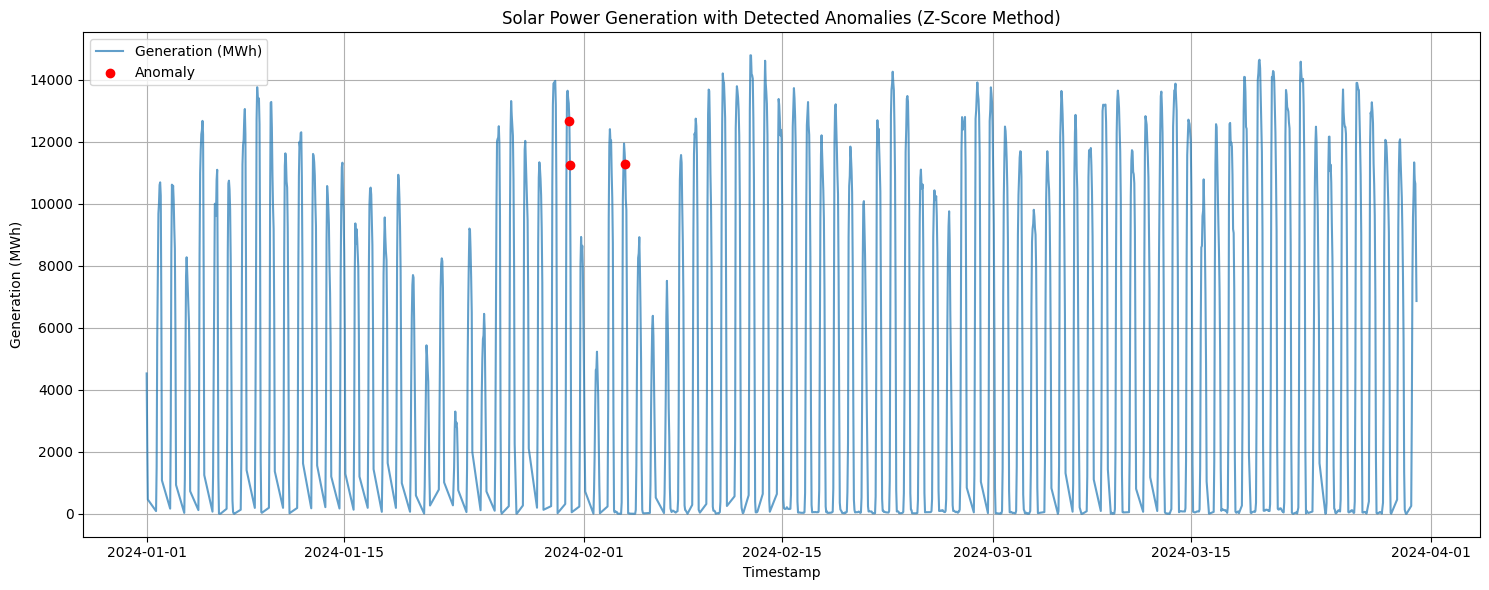

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('../data/processed/solar_california_cleaned.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Calculate rolling statistics (24-hour window)
df['rolling_mean'] = df['generation'].rolling(window=24).mean()
df['rolling_std'] = df['generation'].rolling(window=24).std()

# Calculate Z-score for anomaly detection
df['z_score'] = (df['generation'] - df['rolling_mean']) / df['rolling_std']

# Define anomaly threshold
df['anomaly'] = df['z_score'].abs() > 2

# Save to CSV for downstream use
df.to_csv('../data/processed/solar_anomalies_zscore.csv', index=False)

# Plotting anomalies
plt.figure(figsize=(15, 6))
plt.plot(df['timestamp'], df['generation'], label='Generation (MWh)', alpha=0.7)
plt.scatter(df[df['anomaly']]['timestamp'], df[df['anomaly']]['generation'],
            color='red', label='Anomaly', zorder=5)
plt.title('Solar Power Generation with Detected Anomalies (Z-Score Method)')
plt.xlabel('Timestamp')
plt.ylabel('Generation (MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../output/solar_anomalies_zscore_plot.png')
plt.show()